In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dtm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
# Load the data
df_house = pd.read_csv('train.csv')

In [23]:
# Checking the row and column counts
print("No. of rows = ", df_house.shape[0], "and no. of columns = ", df_house.shape[1])
print("Here is some sample records from top and bottom...")
# Print first 5 rows and last 5 rows
df_house.head(14).append(df_house.tail(14))

No. of rows =  1460 and no. of columns =  81
Here is some sample records from top and bottom...


C:\Users\Admin\AppData\Local\Temp\ipykernel_6836\3299096755.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_house.head(14).append(df_house.tail(14))


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [24]:
#Print all the columns and their data types
print(df_house.info(verbose='all', show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
# Count all data types of all columns
print(df_house.dtypes.value_counts())

object     43
int64      35
float64     3
dtype: int64


In [26]:
# Filter Numeric and Categorical Columns
numeric_columns = list(df_house.select_dtypes(exclude='object'))
categorical_columns = list(df_house.select_dtypes(include='object'))
print("categorical columns length: " + str(len(categorical_columns)))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns)))
print(numeric_columns)

categorical columns length: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
numeric columns length: 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 

In [27]:
df_house[numeric_columns].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
# Check duplicated rows
duplicated_rows = df_house.duplicated().value_counts()
df_number_of_duplicated_rows = pd.DataFrame(dict({"duplicated": duplicated_rows.index, "no_rows": duplicated_rows.values}))
print(df_number_of_duplicated_rows)

   duplicated  no_rows
0       False     1460


In [29]:
# Count number of columns have null value
count_nan_columns = (df_house.isnull().sum(axis=0) > 0).sum()
print("No of columns that has null values: " + str(count_nan_columns))

No of columns that has null values: 19


In [30]:
# Check number of rows have NaN values on number of columns over a row
number_of_nan_rows = df_house.isnull().sum(axis=1).sort_values(ascending=False).value_counts()
df_number_of_nan_rows = pd.DataFrame(dict({"no_columns": number_of_nan_rows.index, "no_rows": number_of_nan_rows.values}))
print(df_number_of_nan_rows)

    no_columns  no_rows
0            4      635
1            5      501
2            3      132
3           10       60
4            6       58
5            9       32
6            2       16
7           11        7
8            8        5
9            7        5
10          15        4
11          14        3
12           1        2


In [31]:
# Filter all null columns have row length which equal to row length of data set 
df_house.columns[df_house.isnull().sum() == len(df_house.index)]

Index([], dtype='object')

In [32]:
# Check the missing values % in each column
print(round(df_house.isnull().sum()/len(df_house.index), 4)*100)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64


In [33]:
# Let's check all the column where we have more than 10% missing data
missing_columns = df_house.columns[100*(df_house.isnull().sum()/len(df_house.index)) > 10]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 6
Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [34]:
# Delete these these above columns
df_house = df_house.drop(missing_columns, axis=1)
count_nan_columns = (df_house.isnull().sum(axis=0) > 0).sum()
print("No of columns that has null values: " + str(count_nan_columns))

No of columns that has null values: 13


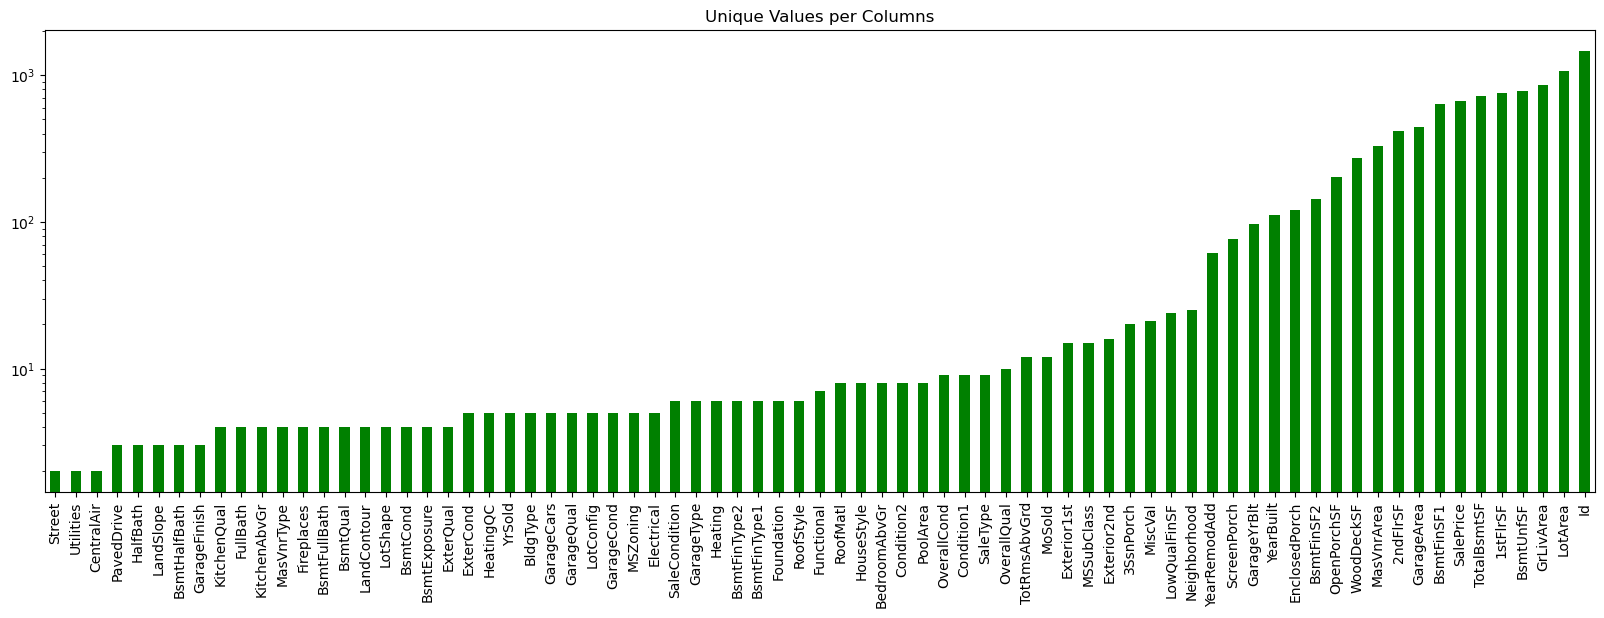

Street           2
Utilities        2
CentralAir       2
PavedDrive       3
HalfBath         3
              ... 
1stFlrSF       753
BsmtUnfSF      780
GrLivArea      861
LotArea       1073
Id            1460
Length: 75, dtype: int64


In [35]:
# For each numerical feature compute number of unique entries
unique_values = df_house.nunique().sort_values()

# Plot information with y-axis in log-scale
ax = unique_values.plot.bar(logy=True, figsize=(20, 6), title="Unique Values per Columns", color = "green")
plt.show()
# Print number of distinct elements in specified axis.
print(unique_values)